<a href="https://colab.research.google.com/github/bibhutisika/bibhutisika/blob/main/Movie_Recommendation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import ipywidgets as widgets
from ipywidgets import interact


In [6]:
data=pd.read_csv("/content/movie_metadata.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
#lets check the shape
print(data.shape)


(5043, 28)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [9]:
data = data.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes',  
                      'facenumber_in_poster', 
                      'content_rating', 
                      'country', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      ],axis = 1)

In [10]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [11]:
data.isnull().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [12]:
len(data.index)

5043

In [13]:
#lets check the rows having high percentage of missing values in the dataset
round(100*(data.isnull().sum()/len(data.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [14]:
#NOW LETS AGAIN CHECK THE MISSING VALUES COLUMN WISE
data.isnull().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [15]:
data[~np.isnan(data['gross'])]

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701.0,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,738.0,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Neill Dela Llana,35.0,80.0,Edgar Tancangco,70071.0,Thriller,Ian Gamazon,Cavite,589,Quynn Ton,35.0,English,7000.0,2005.0,6.3,74
5035,Robert Rodriguez,56.0,81.0,Peter Marquardt,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,Consuelo Gómez,130.0,Spanish,7000.0,1992.0,6.9,0
5037,Edward Burns,14.0,95.0,Caitlin FitzGerald,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,Daniella Pineda,14.0,English,9000.0,2011.0,6.4,413
5041,Daniel Hsia,14.0,100.0,Daniel Henney,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,Eliza Coupe,9.0,English,NaN,2012.0,6.3,660


In [16]:
data=data[~np.isnan(data['gross'])]
data=data[~np.isnan(data['budget'])]
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [17]:
#lets input the missing values

#using mean for numerical columns

data['duration'].fillna(data['duration'].mean(), inplace = True)
#using mode for categorical column

#Unknown Actor 
data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)
data.isnull().sum().sum()

7

In [18]:
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [47]:
data['profit']=data['gross']-data['budget']

In [20]:
data[['profit','movie_title']].sort_values(by='profit', ascending = False).head(10)

,profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [21]:
#Lets check values in the language columns
data['language'].value_counts()

English       3707
French          37
Spanish         26
Mandarin        15
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Hebrew           3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [22]:
#Looking at the above output we can easily observe that out of 3500 mmovies only 1500 are of other languages
#So it is better to keep only 2 languages i.e. Engish and Foreign 
#We have done this process in following ways

In [23]:
def language(x):
  if x == 'English':
      return 'English'
  else:
      return 'Foreign'

In [24]:
#lets apply thee function on the language column
data['language'] = data['language'].apply(language)

#lets check the values again
data['language'].value_counts()

English    3707
Foreign     184
Name: language, dtype: int64

In [27]:
#the duration of mmovies is not varyinng a lot but we know that most of the users either like watching long movies or short
#Duration movies.We can categorise thhe movies in 2 part i.e. short and long
#Lets define a functiuon for categorizing duration of movies
def duration (x):
    if x <= 120:
      return 'short'
    else:
      return 'Long'
data['duration'] = data['duration'].apply(duration)

#lets apply this function on the duration column
data['duration'] = data['duration'].apply(duration)

#lets check the values of duration column
data['duration'].value_counts()

TypeError: ignored

In [28]:
#lets check the values in the genres column
data['genres'].value_counts()

Drama                                            154
Comedy|Drama|Romance                             151
Comedy|Drama                                     148
Comedy                                           147
Comedy|Romance                                   136
                                                ... 
Action|Adventure|Crime|Drama|Mystery|Thriller      1
Action|Crime|Drama|Thriller|War                    1
Adventure|Comedy|Family|Musical                    1
Action|Adventure|Family|Fantasy|Sci-Fi             1
Comedy|Crime|Horror                                1
Name: genres, Length: 762, dtype: int64

In [29]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [30]:
#We can see from the abovee output that most of the movies are having a lot of genres
#also, a movie can haveso many genres so lets keep four genres

data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1']  = data['Moviegenres'].apply(lambda  x:  x[0])

#Some of the  Movies  have only one  Genre. In such cases, assign the same genre  to 'genre_2' as well
data['Genre2']  = data['Moviegenres'].apply(lambda  x: x[1]  if len(x) >  1  else  x[0])
data['Genre3']  = data['Moviegenres'].apply(lambda  x: x[1]  if len(x) >  2  else  x[0])
data['Genre4']  = data['Moviegenres'].apply(lambda  x: x[1]  if len(x) >  3  else  x[0])

#lets check the head of the data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Adventure,Adventure
1,Action|Adventure|Fantasy,Action,Adventure,Adventure,Action
2,Action|Adventure|Thriller,Action,Adventure,Adventure,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Adventure,Action


TOP 10 MOST POPULAR MOVIES ON SOCIAL MEDIA

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice                  0.001600
1    150                        Ghostbusters                  0.001076
2   1582                        Ghostbusters                  0.001076
3     96                        Interstellar                  0.001025
4   3015               10 Days in a Madhouse                  0.000828
5    945                      Into the Woods                  0.000693
6     73                       Suicide Squad                  0.000653
7   1190                Fifty Shades of Grey                  0.000624
8    108                            Warcraft                  0.000623
9     92        Independence Day: Resurgence                  0.000599


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


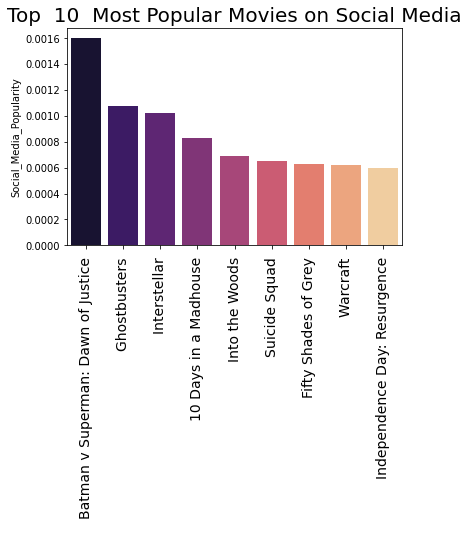

In [31]:
#lets  calculate the social media popularity of a movie
#to calculate popularityof a movie, we can aggregate No of voted users, No of users for reviews, and facebook likes.
data['Social_Media_Popularity'] = ((data['num_user_for_reviews']/data['num_voted_users'])*(data['movie_facebook_likes']))/1000000

#lets alsso check the top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                               ascending = False).head(10).reset_index()
print(x)

sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top  10  Most Popular Movies on Social Media',  fontsize=20)
plt.xticks(rotation = 90, fontsize  = 14)
plt.xlabel(' ')
plt.show()

AttributeError: ignored

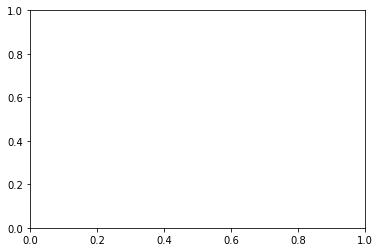

In [36]:
#lets compare  the Gross with Genres

#first group the genres and get max, min, and avg gross of the movies of that genre.
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

#lets plot these values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', colors = ['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arrange(17), ['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary',
                            'Drama','Family','Sci-Fi','Thriller','Fantasy','Horror','Musical',
                            'Mystery','Romance','Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()                            

In [48]:
print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['profit'].idxmax()][['Genre1','movie_title','gross']].style.background_gradient(cmap = 'copper'))

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [41]:
#lets convert year into integer
data['title_year']  = data['title_year'].astype('int')

In [51]:
print('Most Profitable Years in Box Office')
display(data[['title_year','language','profit']].groupby(['language','title_year']).agg('sum').sort_values(by = 'profit',
                  ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

Most Profitable Years in Box Office


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


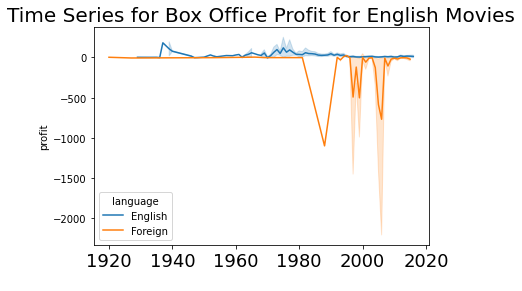

In [52]:
#lets plot them 
sns.lineplot(data['title_year'], data['profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

In [57]:
print("Movies that Made Huge Losses")
display(data[data['profit'] < -2000][['movie_title','language','profit']].style.background_gradient(cmap = 'Reds'))

Movies that Made Huge Losses


,movie_title,language,profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [ ]:
#Gross For Long And Short Movie

In [58]:
#Average IMDB Score For Duration of Movies_

In [62]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)

    y = y[['movie_title',
           'budget',
           'title_year'
           'genres',
           'language',
           'imdb_score',
           ]]
    return y

In [65]:
query_actors('Emma Stone')

KeyError: ignored

In [ ]:
#Top Movies based on Gross, and IMDB

RECOMMENDING MOVIES BASED ON LANGUAGE

In [66]:
def recommend_lang(x):
  y = data[['language','movie_title','imdb_score']][data['language'] == x]
  y = y.sort_values(by = 'imdb_score', ascending = False)
  return y.head(15)

In [67]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
3931,Foreign,Samsara,8.5
4259,Foreign,The Lives of Others,8.5
4921,Foreign,Children of Heaven,8.5
2970,Foreign,Das Boot,8.4
4659,Foreign,A Separation,8.4
1298,Foreign,Amélie,8.4


Recommending Movies based on Actors

In [71]:
def recommend_movies_on_actors(x):
  a = data[['movie_title','imdb_score']][data['actor_1_name'] ==x]
  b = data[['movie_title','imdb_score']][data['actor_2_name'] ==x]
  c = data[['movie_title','imdb_score']][data['actor_3_name'] ==x]
  a = a.append(b)
  a = a.append(c)
  a = a.sort_values(by = 'imdb_score', ascending = False)
  return a.head(15)

In [72]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


Recommending Movies of simillar Genres

In [74]:
from mixtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

#letscheck the head of x
x.head()

ModuleNotFoundError: ignored